In [1]:
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
import os
from matplotlib import pyplot as plot

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Classes of dataset: {classes}')

Classes of dataset: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
def get_accuracy(model, data_loader, device):
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader:
            labels, images = labels.to(device), images.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            n += labels.size(0)
            tp += (predicted == labels).sum()
    return tp / n

In [5]:
import time

def train(model, data_loader, epochs, loss_function, optimizer, device):
    model = model.to(device)
    for epoch in range(epoches):
        t0 = time.time()
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            y = model(images)
            loss = loss_function(y, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        t1 = time.time()
        print(f'Epoch[{epoch + 1}]: accuracy = {get_accuracy(model, data_loader, device)}, time = {t1 - t0}')
    print(f'Test accuracy: {get_accuracy(model, data_loader, device)}')

In [6]:
model_descs = [
    {'name': 'densenet201', 'weights': 'DenseNet201_Weights.IMAGENET1K_V1', 'transform': torchvision.models.DenseNet201_Weights.IMAGENET1K_V1.transforms()},
    {'name': 'resnet18', 'weights': 'ResNet18_Weights.IMAGENET1K_V1', 'transform': torchvision.models.ResNet18_Weights.IMAGENET1K_V1.transforms()},
    {'name': 'resnet152', 'weights': 'ResNet152_Weights.IMAGENET1K_V2', 'transform': torchvision.models.ResNet152_Weights.IMAGENET1K_V2.transforms()},
    {'name': 'mobilenet_v3_small', 'weights': 'MobileNet_V3_Small_Weights.IMAGENET1K_V1', 'transform': torchvision.models.MobileNet_V3_Small_Weights.IMAGENET1K_V1.transforms()},
]

results = {}

In [7]:
batch_size = 64
epoches = 10
learning_rate = 0.001

In [8]:
def expr_1(model_desc):
    trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=True, transform=model_desc['transform'])
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

    testset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=True, transform=model_desc['transform'])
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = getattr(torchvision.models, model_desc['name'])(weights=model_desc['weights'])

    for param in model.parameters():
        param.requires_grad = False

    if model_desc['name'] in ('resnet18', 'resnet152'):
        num_features = model.fc.in_features
        model.fc = torch.nn.Linear(num_features, 10)
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.fc.parameters(), lr=learning_rate)
    elif model_desc['name'] in ('densenet201'):
        num_features = model.classifier.in_features
        model.classifier = torch.nn.Linear(num_features, 10)
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.classifier.parameters(), lr=learning_rate)
    else:
        num_features = model.classifier[-1].in_features
        model.classifier[-1] = torch.nn.Linear(num_features, 10)
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.classifier[-1].parameters(), lr=learning_rate)

    print(model)
    train(model, train_loader, epoches, loss_function, optimizer, device)
    result = get_accuracy(model, test_loader, device)
    print(f'Validation accuracy: {result}')
    results[model_desc['name'] + '_e1'] = result

In [9]:
expr_1(model_descs[0])

Files already downloaded and verified
Files already downloaded and verified
DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, e

In [10]:
expr_1(model_descs[1])

Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1

In [11]:
expr_1(model_descs[2])

Files already downloaded and verified
Files already downloaded and verified
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsampl

In [12]:
expr_1(model_descs[3])

Files already downloaded and verified
Files already downloaded and verified
MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (

In [13]:
def expr_2(model_desc):
    transform_train = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.49139968,0.48215841,0.44653091], [0.24703223, 0.24348513, 0.26158784]),
    ])
    transform_test = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize([0.49139968,0.48215841,0.44653091], [0.24703223, 0.24348513, 0.26158784]),
    ])
    trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True, download=False, transform=transform_train)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

    testset = torchvision.datasets.CIFAR10(root='./dataset', train=False, download=False, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = getattr(torchvision.models, model_desc['name'])(weights=model_desc['weights'])

    loss_function = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    print(model)
    train(model, train_loader, epoches, loss_function, optimizer, device)
    result = get_accuracy(model, test_loader, device)
    print(f'Validation accuracy: {result}')
    results[model_desc['name'] + '_e2'] = result

In [14]:
expr_2(model_descs[0])

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [15]:
expr_2(model_descs[1])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
expr_2(model_descs[2])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
expr_2(model_descs[3])

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [44]:
updated_results = dict()
for expr_name in results:
    updated_results[expr_name] = float(results[expr_name])
print(updated_results)

{'densenet201_e1': 0.8215999603271484, 'resnet18_e1': 0.7777000069618225, 'resnet152_e1': 0.8345999717712402, 'mobilenet_v3_small_e1': 0.8071999549865723, 'densenet201_e2': 0.712399959564209, 'resnet18_e2': 0.8303999900817871, 'resnet152_e2': 0.8087999820709229, 'mobilenet_v3_small_e2': 0.6979999542236328, 'my_resnext': 0.9147}


{'densenet201_e1': 0.8215999603271484, 'densenet201_e2': 0.712399959564209, 'mobilenet_v3_small_e1': 0.8071999549865723, 'mobilenet_v3_small_e2': 0.6979999542236328, 'my_resnext': 0.9147, 'resnet152_e1': 0.8345999717712402, 'resnet152_e2': 0.8087999820709229, 'resnet18_e1': 0.7777000069618225, 'resnet18_e2': 0.8303999900817871}


<BarContainer object of 9 artists>

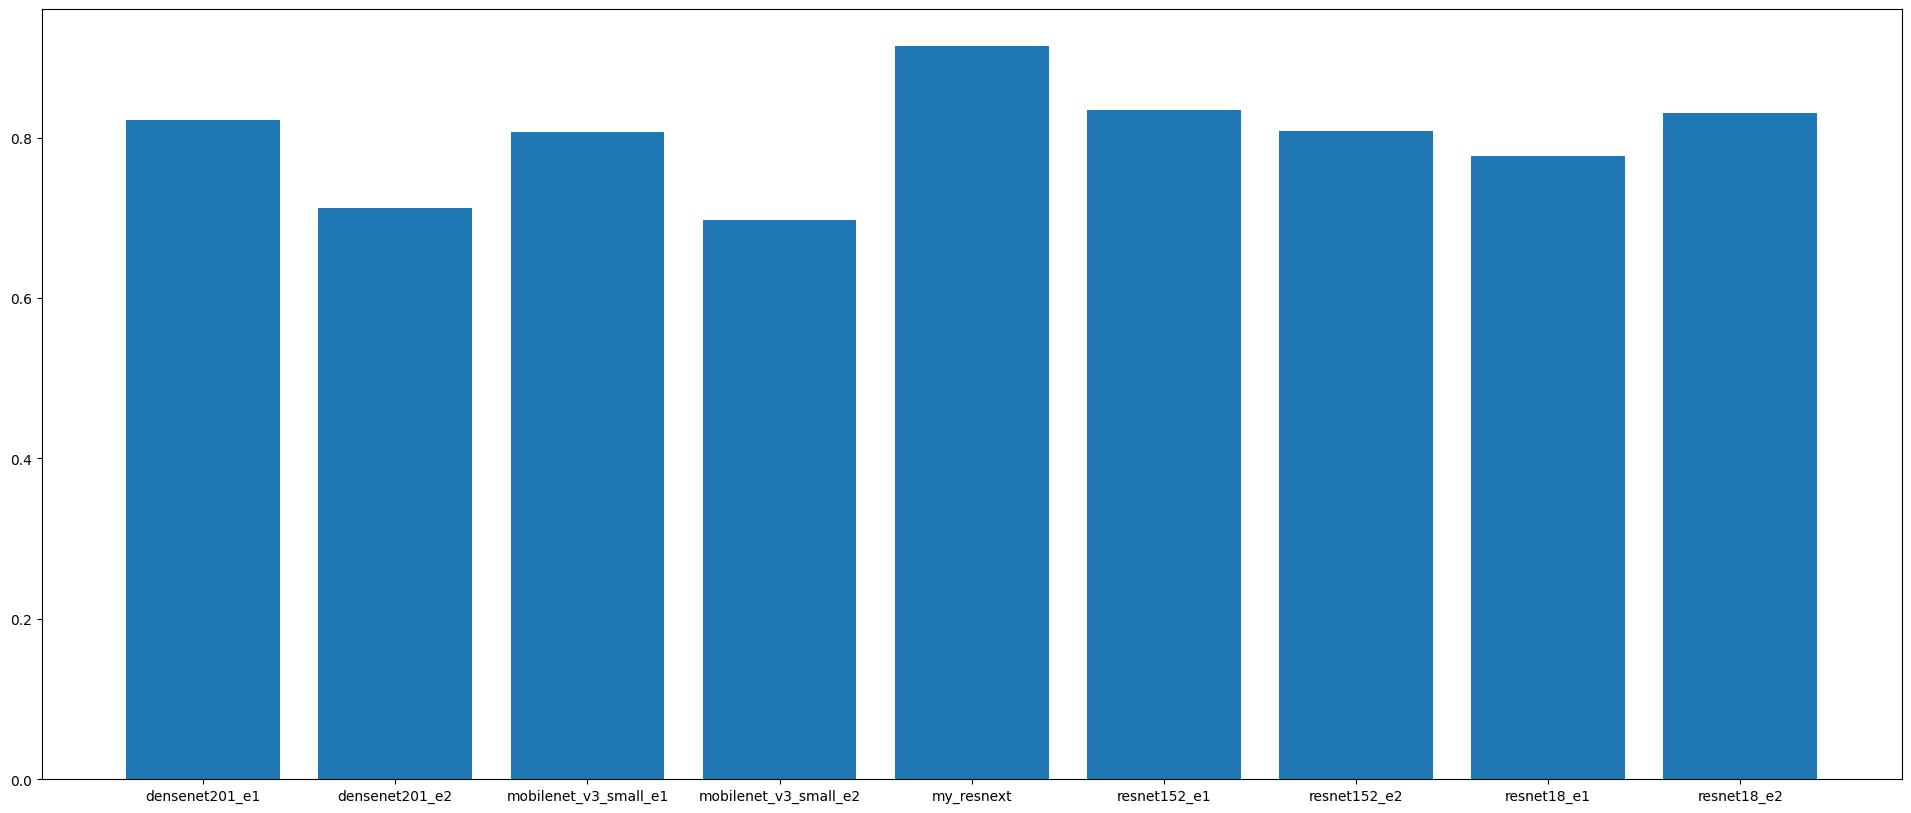

In [47]:
plot.figure(figsize = (24, 10))
sorted_results = dict(sorted(updated_results.items()))
print(sorted_results)
sorted_results['my_resnext'] = 0.9147
names = sorted_results.keys()
values = sorted_results.values()
plot.bar(names, values)